# Shapley Values

머신러닝 모형은 예측 성능을 높이기 위해 점점 복잡해지고 있다. 하지만 예측의 정확도는 증가하고 있으나, 모형의 복잡도는 설명 가능성 또는 해석 가능성은 점차적으로 낮아지고 있다. 여기서 설명 가능이란 말은 **모형의 예측과정을 사람이 쉽게 이해하는 정도**로 정의할 수 있다. 예를 들어 3개의 설명변수가 있는 선형모형의 예측치는
$$
f(x)=\beta_0 + \beta_1x_1 + \beta_2x_2+\beta_3x_3
$$
이다. 예측치 $f(x)$에 대한 설명변수 $x_i$의 기여도(contribution)는 $\beta_ix_i$가 되는 것을 알 수 있다. 이처럼 선형모형에서는 설명변수와 예측값의 관계를 쉽게 도출할 수 있지만, 대부분의 머신러닝에서는 설명변수가 내부적으로 어떻게 연결되어 예측치를 만들어 내는지를 모르는 black-box 모형이다.

선형모형에서 설명변수 $x_2$를 제거하면 $\beta_2x_2$만큼 예측값이 줄어드는 것처럼, 머신러닝 모형의 설명 가능성에 대한 핵심적인 질문은 **특정 설명변수를 모델에서 제거하면 예측치는 얼마나 변화하는가?** 이다. 이러한 아이디어에서 나온 것이 **SHAP(Shapley Additive Explanation) value**이며 SHAP은 각 설명변수가 예측치에 미치는 영향을 수량화한 것이라고 할 수 있다.

SHAP은 개별 예측치에 대한 모형 무관 설명도구(Individualized model-agnostic explainer)로서, 경제학자인 Lloyd Shapley가 제안한 게임이론을 응용한 explainer이다. 모형 무관의 의미는 딥러닝 모형과 같이 내부적으로 어떻게 작동하는지 알지 못하더라도 입력과 출력만 관측되면 적용이 가능하다는 의미이다.

---

## Shapley value의 기본 개념

어떤 [협력게임](https://ko.wikipedia.org/wiki/%ED%98%91%EB%A0%A5_%EA%B2%8C%EC%9E%84)에서 $M$명의 선수가 있다고 하자. $F=\left\{ 1,2,...,M \right\}$으로 선수들의 집합을 정의할 때, $S$가 $F$의 부분집합이면 이를 연대(coalition)라고 한다. 예를 들어, 3명의 선수가 있을 때
$$
F=\left\{ 1,2,3 \right\} and\ S \in \left\{ \emptyset,\left\{ 1 \right\},\left\{ 2 \right\},\left\{ 3 \right\}\left\{ 1,2 \right\}\left\{ 1,3 \right\}\left\{ 2,3 \right\}\left\{ 1,2,3 \right\} \right\}
$$
이 된다. $F$도 하나의 연대이고 이를 전체연대(grand coalition)라고 한다. $v(S)$를 연대 $S$의 가치라고 할 때, 이 $v(s)$를 이용하여 Shapley value를 구하는 과정을 살펴본다.

Shapley value에서 선수가 없는 게임의 가치를 $v(\emptyset)=0$으로 가정한다. 세 명의 선수 중 선수2와 선수3은 기술적으로 거의 같다고 했을 때,
$$ 
v(\left\{ 1,2 \right\})-v(\left\{ 1 \right\})= 10000
$$
로, 선수2의 기여도는 10000이지만
$$
v(\left\{ 1,2,3 \right\})-v(\left\{ 1,2 \right\})= 1000
$$
이면 선수3의 기여도 1000으로 평가된다. 선수2와 선수3의 기량이 비슷하기 때문에 충분히 일어날 수 있는 일이다. 만약 선수3이 면저 게임에 참여했으면
$$
v(\left\{ 1,3 \right\})-v(\left\{ 1 \right\}) \approx 10000
$$
이 되어서 선수3의 기여도가 10000이 될 수 있었을 것이다. 즉, 선수의 기여도가 게임에 참석하는 순서에 영향을 받을 수 밖에 없게 된다.

선수 $i$의 순서에 영향을 받지 않는 기여도를 구하기 위해 $F$의 모든 순열(permutation)에서 선수 $i$의 기여도를 모두 구한 후 평균을 산출한다.

<center>

| permutation | 선수1 | 선수2 | 선수3 |
|:-----------:|:------:|:------:|:------:|
| {1,2,3}    | $ v(\{1\}) - v(\emptyset) $ | $ v(\{1,2\}) - v(\{1\}) $ | $ v(\{1,2,3\}) - v(\{1,2\}) $ |
| {1,3,2}    | $ v(\{1\}) - v(\emptyset) $ | $ v(\{1,3\}) - v(\{1\}) $ | $ v(\{1,2,3\}) - v(\{1,3\}) $ |
| {2,1,3}    | $ v(\{1,2\}) - v(\{2\}) $ | $ v(\{2\}) - v(\emptyset) $ | $ v(\{1,2,3\}) - v(\{1,2\}) $ |
| {2,3,1}    | $ v(\{1,2,3\}) - v(\{2,3\}) $ | $ v(\{2,3\}) - v(\{2\}) $ | $ v(\{2\}) - v(\emptyset) $ |
| {3,1,2}    | $ v(\{1,3\}) - v(\{3\}) $ | $ v(\{1,2,3\}) - v(\{1,3\}) $ | $ v(\{3\}) - v(\emptyset) $ |
| {3,2,1}    | $ v(\{1,2,3\}) - v(\{2,3\}) $ | $ v(\{2,3\}) - v(\{3\}) $ | $ v(\{3\}) - v(\emptyset) $ |
| **평균**   | $ \phi_1 $ | $ \phi_2 $ | $ \phi_3 $ |

</center>

위의 표에서 permutation은 게임에 참가하는 순서를 나타내고 이 순서에 따라 3명의 선수들의 기여도를 구한 후, 이를 평균하여 Shapley value $\phi_1,\phi_2,\phi_3$으로 표기하고 있다. 표에서 볼 수 있듯이 선수의 기여도는 게임에 참여하는 순서에 의존하지만, 연대의 가치 $v(S)$는 순서에 의존하지 않는다. 예를 들어,
$$
v(\{1,2\})=v(\{2,1\})\ and\ v(\{1,2,3\})=v(\{2,1,3\})
$$
을 가정한다. 또한
$$
\phi_1+\phi_2+\phi_3=v(\{1,2,3\})=v(F)
$$
를 만족한다는 것을 쉽게 확인할 수 있다. 즉, 가치함수 $v(S)$에 어떤 값을 부여해도 $\phi_1+\phi_2+\phi_3=v(F)$를 만족하는 것을 알 수 있으며 이를 Shapley value의 덧샘법칙(additivity)라고 한다.  
예를 들어, 임의로 $v(\{1\})=1$, $v(\{2\})=2$, $v(\{3\})=3$, $v(\{1,2\})=-2$, $v(\{1,3\})=5$, $v(\{2,3\})=3$, $v(\{1,2,3\})=7$로 부여하더라도 $\phi_1+\phi_2+\phi_3=7$이 된다.

$F=\{1,2,...,M\}$일 때 선수 $i$에 대한 Shapley value는 다음과 같이 정의된다.
$$
\phi_i = \frac{1}{\left| F \right|!}\sum_{p}^{}(v(S\cup i)-v(S)) \tag 1
$$

<center>

| Notation              |     설명     |
| :------:              | :---------: |
|    $p$                | permutation |
| $\| F \|$             | $F$의 크기 M |
| $S$                   | 고정된 permutation $p$에서 선수 $i$ 이전에 게임에 참가한 선수들의 연대 |

</center>  

예를 들어 permutation $p=\{1,3,2\}$ 일 때, $i=1$이면 $S=\{\emptyset\}$, $i=3$이면 $S=\{1\}$이 된다. 그러므로 permutation $p$가 변하면 $v(S \cup i)$의 $S$도 변하게 된다. 위의 표에서 $\phi_1$을 계산하는 열을 살펴보면 식 $(1)$을 쉽게 이해할 수 있다. 해당 식에서 $S$는 자체의 permutation과 $S \cup i$다음에 나타나는 $(\left| F \right| - \left| S \right|-1)$ 개의 나머지 선수들의 permutation에 대해서도 동일한 $v(S \cup i)-v(S)$ 값을 가지므로 식 $(1)$을 다음과 같이 재표현할 수도 있다.

$$
\phi_i = \sum_{S\subseteq F-\left\{ i \right\}}^{}\frac{\left| S \right|!(\left| F \right|-\left| S \right|-1)!}{\left| F \right|}(v(S\cup i)-v(S)) \tag2
$$

Shapley value의 덧셈법칙(additivity)에 의해 $\sum_{i=1}^{M}\phi_i=v(F)$를 만족한다.

Shapley value의 추가적인 성질으로, 모든 연대(coalition) $S$에 대해 $v(S \cup i) = v(S)$이면 $\phi_i=0$이고 $v(S\cup i)= v(S \cup j)$이면 $\phi_i=\phi_j$임을 식$(1)$을 통해 알 수 있다. 전자를 **dummy**라고 말하며 후자를 **symmetry**라고 한다. dummy는 선수 $i$가 모든 연대에 대해 추가적인 기여도가 없다면 선수 $i$의 기여도는 0이라는 의미이고 symmetry는 두 명의 선수가 모든 연대에 대해 추가적인 기여도가 동일하다면 두 선수의 기여도는 동일하나든 의미를 가진다.

---

## 머신러닝에서의 Shapley value

앞에서 설명한 Shapley value의 개념을 머신러닝 모형 $f(x)$에 적용하기 위해 앞의 예시에서 언급한 '선수'를 정해야 한다. 설명변수 $x=(x_1,x_2,...,x_M)$으로 정의할 때, 머신러닝 모형의 예측값 $f(x)$ 값에 기여하는 것은 설명변수이므로 $x_1,x_2,...,x_M$이 선수가 된다.  
Shapley value의 가치함수를 정의하기 위해
$$
f(\emptyset)=E(f(x)) \tag 3
$$
로 정의하고
$$
v(S)=f(S)-E(f(x)) \tag 4
$$
로 정의한다. 여기서 $F=\{x_1,x_2,...,x_M\}$이고 $S$는 $F$의 부분집합이다. $f(x)$는 $x=(x_1,x_2,...,x_M)$가 관측되었을 때의 모델 $f$의 예측값이며, $E(f(x))$는 예측값의 기댓값이므로 학습데이터로부터 임의로 뽑은 $k$의 표본을 이용하여
$$
\frac{1}{k}\sum_{i=1}^{k}f(x_i) \tag 5
$$
로 추정한다. 식 $(3)$과 $(4)$를 통해
$$
v(\phi) = f(\phi) - E(f(x))=0
$$
이 되어 Shapley value에서 정의한 가치함수 $v$의 기본요건을 충족하는 것을 알 수 있다.

식 $(4)$의 $v(S)$를 계산하기 위해서는 $f(S)$를 계산하여야 한다. 예를 들어, $F=\{x_1,x_2,...,x_5\}$일 때 연대(coalition) $S=\{x_1,x_3\}$이면 $f(x_1,x_3)$를 계산하여야 한다. $f(x_1,x_3)$의 계산은 두 가지 방법이 있다.

- 방법 1 : 원래 모형 $f(x_1,x_2,x_3,x_4,x_5)$와 동일한 모형 $f(x_1)$을 재추정  
- 방법 2 : 이미 추정된 원래 모형 $f(x_1,x_2,x_3,x_4,x_5)$으로부터 $f(x_1,x_3)$을 계산

방법 1의 경우, 설명변수가 적고 선형회귀모델과 같이 간단하 모형 이외에는 계산 부담이 너무 크므로 후자의 방법으로 식 $(4)$의 $f(S)$를 계산할 수 밖에 없다.

***Lundberg & LEE***는
$$
f(S) \approx E(f(x)|S)
$$
로 근사시키는 방법을 제시했다. 설명변수의 부분집합 $S$가 주어진 상태에서의 기대치는 $f(S)$와 일반적으로 일치하지는 않지만 오직 부분집합 $S$만의 함수이고 $E(f(x)|F)=E(f(x)|x)=f(x)$가 된다. 그러므로 $E(f(x)|S)$를 이용하여 다음과 같이 정의한 Shapley value는 앞에서 언급한 덧샘법칙(additivity)를 만족하게 된다.

$v(F)=f(x)-E(f(x))$이므로 Shapley의 덧셈법칙에 의해 $\sum_{i=1}^{M}\phi_i=f(x)-E(f(x))$이 된다. 즉, $f(x)=\sum_{i=1}^{M}\phi_i+E(f(x))$가 된다. 이러한 $\phi_i$를 SHAP value라고 ***Lundberg & Lee***는 정의하였다.  
$\bar{S}=F-S$라고 정의하면
$$
E(f(F)|S)=\int_{}^{}f(S,\bar{S})p(S,\bar{S}|S)d\bar{S}
$$
가 된다. $\bar{S}$에 속하는 설명변수를 적분하므로 $E(f(F)|S)$는 오직 $S$에 속하는 설명변수의 함수가 되게 한다. 그러나 조건부 분포함수 $p(S,\bar{S}|S)$는 대부분의 경우 계산이 불가능하거나 어렵기 때문에 SHAP에서는 $p(S,\bar{S}|S)=p(S,\bar{S})$, 즉 설명변수가 서로 독립이라는 가정 하에서
$$
E(f(F)|S)=\int_{}^{}f(S,\bar{S})p(S,\bar{S})d\bar{S} \tag 6
$$
으로 정의하게 된다. 이는 다음과 같이 추정할 수 있다.
$$
\frac{1}{k}\sum_{i=1}^{k}f(S,\bar{S}^{(i)})
$$
여기서 $k$는 학습데이터로부터 임의로 추출된 표본 수이다. 예를 들어 $F=\{x_1,x_2,...,x_5\}$, $\bar{S}=\{x_2,x_4,x_5\}$이면
$$
\frac{1}{k}\sum_{i=1}^{k}f(x_1,x_2^{(i)},x_3,x_4^{(i)},x_5^{(i)}) \tag 7
$$
로 추정하게 된다.

식 $(5)$와 $(7)$을 구하기 위해 $E(f(x))$와 SHAP value의 추정치를 구체적으로 구하기 위해선 다음과 같이 shap을 설치해야한다.

<center>

`pip install shap`

</center>

shap 라이브러리는 다음과 같이 매우 간단한 구조를 가지고 있다.

```python
import shap
explainer = shap.Explainer(predict_fn, data1)
shap_values = explainer(data2)
```

먼저 shap을 호출한 후, `shap.Explainer` 내에 옵션으로 미리 학습된 모델의 예측함수와 shap value를 추정할 데이터 `data1`을 지정하여 `shap.Explainer`를 동기화한다. shap value를 구할 표본(들)인 `data2`를 explainer에 적용하여 `shap_values`로 저장한다. shap 라이브러리는 `Explainer` 이외에도 `KernelExplainer`,`TreeExplainer`,`DeepExplainer` 등의 클래스도 있으며  문법은 앞의 설명과 거의 동일하다.

다음은 Boston housing 데이터를 이용하여 주택가격을 예측하기 위해 선형회귀 모형을 적합하고 있다.

In [15]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [5]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
boston_df = pd.read_csv(url)

X=boston_df[['lstat','age','rad','nox']]
y=pd.Series(boston_df['medv'])

X100=X[100:200]

In [8]:
model = LinearRegression()
model.fit(X,y);

`X100=X[100:200]`으로 정의하여 해당 데이터를 이용하여 다음과 같이 식 $(5)$와 $(8)$을 계산한다. 그러므로 $k=100$이 된다. 아래 코드에서 `shap.Explainer`에 적용할 머신러닝 모형과 데이터(X100)를 입력한 후, 첫 번째 표본의 SHAP value를 구한다.

In [12]:
print(model.predict(X.iloc[0:1]))

import shap
explainer = shap.Explainer(model,X100)

shap_value = explainer(X.iloc[0:1])
print(shap_value)

[30.44394072]
.values =
array([[ 7.80921425, -0.73084402,  0.12905011,  0.23758952]])

.base_values =
array([22.99893087])

.data =
array([[ 4.98 , 65.2  ,  1.   ,  0.538]])


위의 결과에서 `.value`는 식 $(7)$으로부터 계산한 4개 설명변수의 SHAP value를 보여준다. `.base`는 식 $(5)$로부터 구한 예측 기댓값이며, `.data`는 첫 번째 표본의 설명변수 값이다. `shap.Explainer`를 이용하여 SHAP value를 계산하기 위해 $O(2^{M-1}Mk)$의 비용이 필요하다. 여기서 $M$은 설명변수의 수, $k$는 식 $(7)$을 계산하기 위한 표본 수를 의미한다. 그러므로 설명변수의 수가 조금만 커지더라도 계산 부담이 기하급수적으로 증가하게 된다. 이러한 문제를 해결하기 위해 제안된 방법이 **kernelSHAP**이다.

---

## Kernel SHAP

KernelSHAP은 가중선형회귀모형을 대리모형(surrogate)으로 사용하여 Shapley value를 근사적으로 계산한다.

KernelSHAP을 설명하기 위해 연대변수(Coalition variable) $Z^s$를 정의해야 한다. $E(f(F)|S)$의 추정치를 $f_S(s)$라고 정의한다. 즉,
$$
f_S(s)=\frac{1}{k}\sum_{i=1}^{k}f(S,\bar{S}^{(i)})
$$
$Z^s$는 $S$를 표기하는 더미변수(Dummy variable)이다. 예를 들어, $F=\{x_1,x_2,...,x_5\}$이고 $S=\{x_1,x_3,x_5\}$이면 $Z^{s}=(1,0,1,0,1)$이 된다. 이 $Z^{s}$를 이제 다음과 같이 표기한다.
$$
(z^{s}_1,z^{s}_2,...,z^{s}_M)
$$

kernelSHAP은 $f_S(s)$를 목적값으로 하고 설명변수가 $Z^s$인 선형회귀모형으로 손실함수 MSE를 최소로 하는 선형회귀모형의 모수로 정의된 SHAP value를 추정한다. 더 구체적으로 살펴보면
$$
g(Z^s)=\phi_0+\sum_{i=1}^{M}\phi_iz_i^s,\ \pi(Z^s)=\frac{M-1}{\binom{M}{\left| Z^s \right|}\left| Z^s \right|(M-\left| Z^s \right|)} \tag 8
$$
으로 정의할 때, 가중손실함수(weighted loss function)
$$
\sum_{S\subseteq F}^{}\pi(Z^s)(f_S(s)-g(Z^s))^2 \tag 9
$$
을 최소로 하는 $\phi_0,\phi_1,...,\phi_M$을 구하면, $M\to  \infty$ 일 때 식 $(8)$의 선형회귀 모수 $\phi_0,\phi_1,...,\phi_M$은
$$
\phi_i = \sum_{S\subseteq F-\left\{ i \right\}}^{}\frac{\left| S \right|!(\left| F \right|-\left| S \right|-1)!}{\left| F \right|!}[E(f(x)|S\cup x_i)-E(f(x)|S)]
$$
으로 정의된 SHAP value로 수렴한다는 것을 보여준다. 식 $(8)$에서 $\pi$ 함수를 **Shapley Kernel Function**이라고 부르며, 변수가 많을수록 특정 조합의 기여도를 더 잘 반영하도록 조정된 가중치 역할을 한다.

가중손실함수 $(9)$를 최소화하는 $g(Z^s)$의 모수 $\phi_0,\phi_1,...,\phi_M$은 다음과 같이 가중 선형회귀모형 추정법으로 구할 수 있다.
$$
X=\begin{bmatrix}
z_1 \\
z_2 \\
\vdots  \\

z_{2^M}\end{bmatrix}
$$
$X$는 모든 가능한 $Z^s$로 크기가 $2^M \times M$인 행렬이다. $y_i = f_S(s_i)-\phi_0$라고 하면
$$
Y=\begin{bmatrix}
y_1 \\
y_2 \\
\vdots  \\

y_{2^M}\end{bmatrix}_{2^M \times1},
W=\begin{bmatrix}
 \pi(z_1)&  0&  \cdots &  0\\
 0&  \pi(z_2)&  \cdots &  0\\
 \vdots &  \vdots &  \ddots &  \vdots \\
 0&  0&  0& 
\pi(z_{2^M})\end{bmatrix}_{2^M \times 2^M}
$$
으로 정의한다. 그러면 $g(Z^s)$의 모수 $\phi_0,\phi_1,...,\phi_M$의 추정치는
$$
\Phi=(\phi_1,\phi_2,...,\phi_M)^T=(X^TWX)^{-1}X^TWY
$$
이 된다.

예를 들어, $F={x_1,x_2,x_3}$일 때
$$
X=\begin{bmatrix}
 0&  0&  0\\
 1&  0&  0\\
 0&  1&  0\\
 0&  0&  1\\
 1&  1&  0\\
 1&  0&  1\\
 0&  1&  1\\
 1&  1& 
1\end{bmatrix}
,\ 
Y=\begin{bmatrix}
f_{\emptyset}(\emptyset)-\phi_0 \\
f_{X_1}(x_1)-\phi_0 \\
f_{X_2}(x_2)-\phi_0 \\
f_{X_3}(x_3)-\phi_0 \\
f_{X_1X_2}(x_1,x_2)-\phi_0 \\
f_{X_1X_3}(x_1,x_3)-\phi_0 \\
f_{X_2X_3}(x_2,x_3)-\phi_0 \\

f_{X_1X_2X_3}(x_1,x_2,x_3)-\phi_0\end{bmatrix}
$$
이고

$$
W =
\begin{pmatrix}
\pi(0,0,0) & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & \pi(1,0,0) & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & \pi(0,1,0) & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & \pi(0,0,1) & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & \pi(1,1,0) & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & \pi(1,0,1) & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & \pi(0,1,1) & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & \pi(1,1,1)
\end{pmatrix}
$$
이다.

그러나 $\pi(Z^s)$의 정의에 따라 $Z^s=(0,0,0)$이면 $\left| Z^s \right|=0$이고 $Z^s=(1,1,1)$이면 $M-\left| Z^s \right| = 3-3=0$이다. 따라서 식 $(8)$에 의해 $\pi(0,0,0)=\pi(1,1,1)=\infty$이므로 해를 구할 수 없다. 그러므로 $\pi(0,0,0)$과 $\pi(1,1,1)$인 경우에는 $10^{10}$과 같은 매우 큰 값으로 대체하게 된다.  
여기서 $\pi(0,0,0)=\pi(1,1,1)=\infty$의 의미를 파악하는 것이 중요하다. 손실함수 $(9)$에서
$$
\pi(0,0,0)(f(\emptyset)-\phi_0)^2
$$
이며, $\pi(0,0,0)=\infty$이므로 손실함수를 최소화하는 유일한 방법은 $f(\emptyset)=\phi_0$가 되어야 한다. SHAP value에서 $f_{\phi}(\phi)=E(f(x))$이므로 $\phi_0 = \frac{1}{k}\sum_{i=1}^{k}f(x_i)$로 대체하게 된다.  
또한 $\pi(1,1,1)$인 경우
$$
\pi(1,1,1)(f_{X_1X_2X_3}(x_1,x_2,x_3)-\phi_0-\phi_1-\phi_2-\phi_3)
$$
이고 $\pi(1,1,1)=\infty$이므로 손실함수를 최소화하는 유일한 방법은
$$
f_{X_1X_2X_3}(x_1,x_2,x_3)=\phi_0+\phi_1+\phi_2+\phi_3
$$
이어야 한다. 그러므로 특정 표본의 예측치는 $E(f(x))$와 각 설명변수의 SHAP value들의 합과 같다는 덧셈공식(additivity)을 만족하게 된다. 물론 $Y$에 정의된 $f_S(s)$는 $\frac{1}{k}\sum_{\bar{S}}^{}f(S,\bar{S})$를 의미한다.

KernelSHAP의 $\Phi=(\phi_1,\phi_2,...,\phi_M)^T=(X^TWX)^{-1}X^TWY$에서 $(X^TWX)^{-1}X^TW$는 특정표본값에 의존하지 않은 상수이다(Linear smoother라고도 한다.). 다수의 표본 예측값의 SHAP value를 구할 때 $(X^TWX)^{-1}X^TW$는 한 번만 구하고 $Y$만 변경하면 되므로 계산부담을 줄이는 데 매우 유리하다. 또한 KernelSHAP에서 가중치 $W$는 대부분 아주 작은 값을 가지고 있으며 $\pi(Z^s)\to\pi(0,0,...,0)$ 또는 $\pi(1,1,...,1)$로 접근함에 따라 $\pi(Z^s)$가 증가하므로 $W$의 값에 비례하여 $2^M$개의 coalition 중 $d$개를 임의 추출하여 $g(Z^s)$의 모수 $\phi_1,\phi_2,...,\phi_M$을 추정해도 된다. 이를 Kernel Shap with sampling이라고 한다. KernelSHAP을 구하기 위해 오직 $O(2^M)$의 계산비용이 필요하므로 `Shap.Explainer`보다 계산비용 측면에서 더욱 효율적이다.

다음은 Boston housing 데이터로 13개의 설명변수 중 9개의 설명변수로 데이터를 정의한 후, Random forest 모형을 적합한다. $f_S(s)$를 계산하기 위해 최초의 100개 데이터를 할당하고 470번째 표본의 SHAP value를 구하기 위해 이 표본을 `data_to_explain`으로 지정한다.

In [5]:
from sklearn.ensemble import RandomForestRegressor

url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
boston_df = pd.read_csv(url)

X=boston_df[['age','rad','tax','dis','rm','lstat','b','indus','chas']]
y=pd.Series(boston_df['medv'])

rf_model=RandomForestRegressor(max_depth=6,random_state=0,n_estimators=10).fit(X,y)

X_train = X.iloc[:100].copy()
data_to_explain = X.iloc[470:471].copy()

다음과 같이 `shap.KernelExplainer`를 호출하여 rf_model.predict와 X_train을 입력한 후, $\phi_0$와 $\phi_1\sim \phi_9$ (k_shap_values)를 출력한다.

In [11]:
import shap
explainer = shap.KernelExplainer(rf_model.predict,X_train)
k_shap_values = explainer.shap_values(data_to_explain)
phi0=explainer.expected_value

  0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
print(phi0)
print(k_shap_values)

22.742007259290904
[[ 0.0413686  -0.04788727 -0.39765889  0.09282999 -0.8888258  -2.86457421
   0.21919233 -0.11143531  0.        ]]


X_train 대신 `shap.sample(X,300)`으로 전체 데이터 $X$에서 임의로 300개의 표본을 뽑아 $f_S(s)$를 추정하는 데 사용할 수 있다.

In [21]:
explainer = shap.KernelExplainer(rf_model.predict,shap.sample(X,300))
k_shap_values = explainer.shap_values(data_to_explain)
phi0 = explainer.expected_value
print(phi0)
print(k_shap_values)

Using 300 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/1 [00:00<?, ?it/s]

22.060965273702294
[[ 9.76264478e-02 -1.31595574e-01 -4.12014631e-01  8.04392401e-01
  -1.49529012e+00 -2.44581224e+00  3.88796652e-01 -8.08207278e-02
  -1.23079365e-03]]


$f_S(s)$를 계산하기 위해 이용한 100개의 표본으로 구성된 X_train과 300개의 임의표본을 사용했을 때와 비교하면 SHAP value가 다른 것을 볼 수 있을 것이다. 당연한 결과이지만 통계적인 관점에서 더 많은 표본을 사용한 SHAP value가 통계적으로 유의하므로 임의표본 300개로 계산된 SHAP value가 좀 더 유의미하다.

이러한 이유로 $f_S(s)$를 계산하는 데 있어서 임의성을 최소화하기 위해 전체 데이터 $X$를 $C$개의 군집(cluster)로 나눈 후, $C$개 군집의 설명변수 평균을 대입하여 $f_S(s)$를 계산한다. 그러나 평균을 대입할 때, 군집 내의 표본 수에 비례하여 가중치를 부여, 즉
$$
\frac{1}{\sum_{i=1}^{C}w_i}\sum_{i=1}^{C}w_if(S,\bar{S})
$$
으로 $E[f(S,\bar{S})|S]$를 추정하게 된다. 여기에서 $w_i$는 $i$번째 군집 내에 있는 표본 수이며 $\bar{S}^{(i)}$는 $i$번째 군집 내에 있는 설명변수의 평균이다. 이를 위해 `shap.kmeans`를 이용하면 되며, 아래는 군집 수를 $C=100$으로 정의하고 있다.

In [22]:
explainer = shap.KernelExplainer(rf_model.predict,shap.kmeans(X,100))
k_shap_values = explainer.shap_values(data_to_explain)
phi0 = explainer.expected_value

print(phi0)
print(k_shap_values)

  0%|          | 0/1 [00:00<?, ?it/s]

21.52658874817462
[[ 0.09887628 -0.07201704 -0.44793334  0.91173309 -0.91494076 -2.59163092
   0.38000121 -0.10566059  0.        ]]


---

## Tree Shap

TreeShap은 의사결정나무를 기반으로 하는 앙상블 모형에 특화되어 설명변수의 SHAP value를 제공한다. TreeShap에서는 **Intervention**과 **tree_path_dependent** 등 두 가지 방법으로 $E[f(x)|S]$를 추정할 수 있다.  
`Intervention`은 이전에 언급한 방법으로, 설명변수가 독립이라는 가정에서 $\frac{1}{k}\sum_{\bar{S}}^{}f(S,\bar{S})$로 $E[f(x)|S]$를 추정하는 방법을 말한다. 두 번째 방법인 `tree_path_dependent`는 설명변수의 독립성 가정을 하지 않고, 주어진 coalition $S$의 tree-path만으로 $E[f(x)|S]$를 추정하게 된다.

다음은 Boston house 데이터에서 4개의 설명변수 $x_1=age,x_2=rad,x_3=tax,x_4=dis$로 Decision Tree를 구축하는 예시이다.

In [24]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

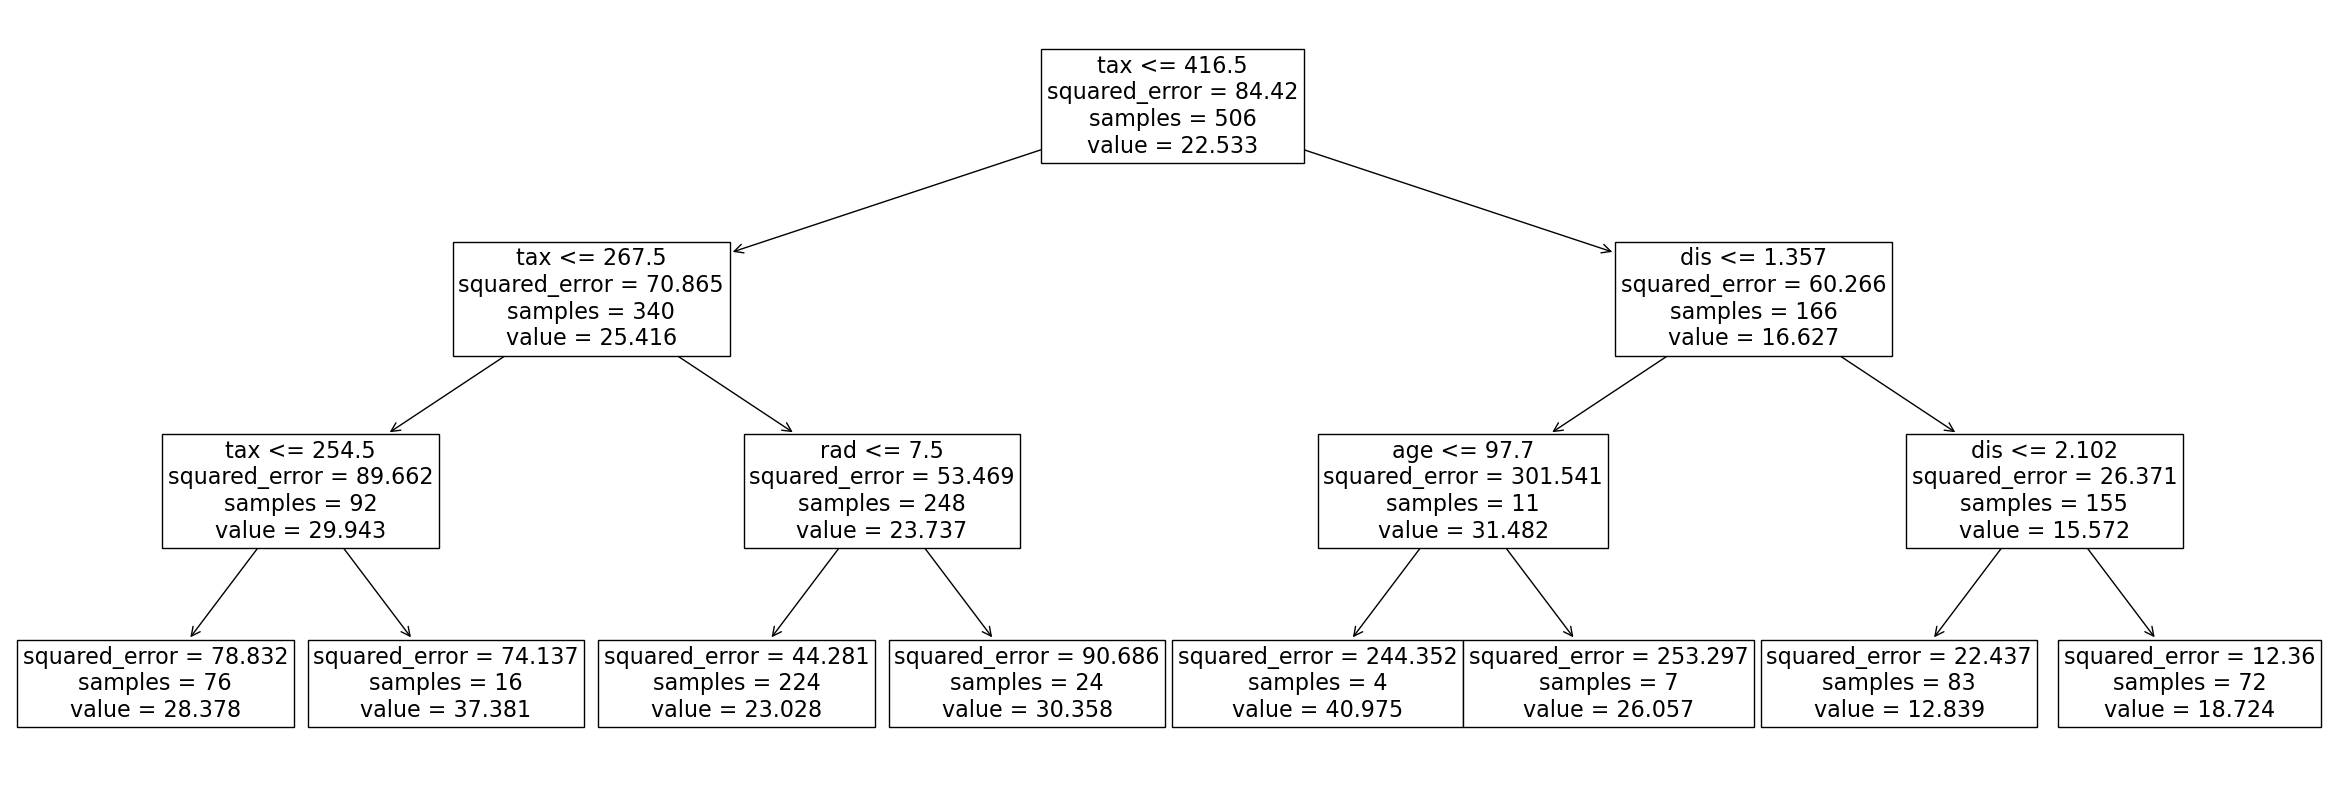

In [30]:
X=boston_df[['age','rad','tax','dis']]
y=pd.Series(boston_df['medv'])

tree_model = DecisionTreeRegressor(max_depth=3)
tree_model.fit(X,y);

fig = plt.figure(figsize=(30,10))
plot_tree(tree_model,feature_names=X.columns,fontsize=16)
plt.show()

이 예제에서 $F=\{x_1,x_2,x_3,x_4\}$이고 연대(coalition)가 $S_1 =\{x_1,x_3,x_4\}$와 $S_2 =\{x_2\}$일 때, $E[f(x_1,x_2,x_3,x_4)|S_1]$과 $E[f(x_1,x_2,x_3,x_4)|S_2]$를 추정하는 절차를 논의한다. 여기서 $f$는 Decision Tree이다. 아래는 첫 번째 표본의 설명변수값과 모델 $f$의 예측값을 보여준다.

In [31]:
print(X.iloc[0])
print(tree_model.predict(X.iloc[0:1]))

age     65.20
rad      1.00
tax    296.00
dis      4.09
Name: 0, dtype: float64
[23.02767857]


$E[f(x_1,x_2,x_3,x_4)\ |\ age=65.2,tax=296,dis=4.09]$의 추정치 $f_S(x_1,x_3,x_4)$를 위의 의사결정나무을 통해 tree_path_dependent 방법으로 구해본다.

$tax = 296$으로 주어졌으므로 루트에 있는 $tax \le 416.5$를 만족하므로 왼쪽 자식루트로 이동한다. 왼쪽 자식루트인 $tax \le 267.5$를 만족하지 못하므로 depth=2의 오른쪽 자식루트 $rad \le 7.5$로 이동한다. 그러나 $S_1=\{age=65.2,tax=296,dis=4.09\}$에 있지 않으므로
$$
f_S(x_1,x_3,x_4)=\frac{224}{248} \times\ 23.028\ +\frac{24}{248}\ \times 30.358 = 23.737
$$
이 된다.


이제 $E[f(x_1,x_2,x_3,x_4) |\ rad=1]$의 추정치 $f_S(x_2)$를 구해본다. $tax$가 주어지지 않았으므로 루트에서 $\frac{166}{506}$의 확률로 오른쪽으로 이동하고, $\frac{340}{506}$의 확률로 왼쪽으로 이동하게 된다. 먼저 오른쪽으로 이동한 경우를 고려해본다. depth=1에서도 $dis$ 값이 주어지지 않았으므로 depth=2 오른쪽으로 $\frac{155}{166}$ 확률로 이동하고, 왼쪽으로 $\frac{11}{166}$ 확률로 이동하게 된다. $\frac{155}{166}$ 확률로 오른쪽으로 이동하면 $dis$값이 주어지지 않았으므로 왼쪽과 오른쪽으로 각각 $\frac{83}{155}$, $\frac{72}{155}$의 확률로 이동한다. 그러므로
$$
\frac{166}{506} \times\ \frac{155}{166}\times(\frac{83}{155} \times12.839+\frac{72}{155} \times18.724)
$$
가 된다.

한편 depth=2의 왼쪽으로 이동하면 $age$가 주어지지 않았으므로 depth=3의 leaf node로 각각 $\frac{7}{11}$,$\frac{4}{11}$의 확률로 오른쪽과 왼쪽 leaf node로 이동하게 된다. 그러므로  
$$
\frac{166}{506} \times\ \frac{11}{166}\times(\frac{4}{11} \times40.975+\frac{7}{11} \times26.057)
$$

이 되어 루트에서 오른쪽으로 이동했을 때의 $f_S(x_2)$는
$$
[\frac{166}{506} \times\ \frac{155}{166}(\frac{83}{155} \times12.839+\frac{72}{155} \times18.724)]+
[\frac{166}{506} \times\ \frac{11}{166}(\frac{4}{11} \times40.975+\frac{7}{11} \times26.057)] = 5.455
$$
가 된다.

이제 루트 $tax \le 416.5$에서 $\frac{340}{506}$의 확률로 왼쪽으로 이동했을 때를 고려해본다. depth=1에서 $tax$가 주어지지 않았으므로 $\frac{92}{340}$의 확률로 depth=2의 왼쪽으로 이동하고 $\frac{248}{340}$의 확률로 오른쪽으로 이동하게 된다. 왼쪽으로 이동하면 depth=2의 $tax$도 주어지지 않았으므로 depth=3의 최종 leaf에 $\frac{76}{92}$,$\frac{16}{92}$의 확률로 각각 왼쪽 leaf와 오른쪽 leaf로 이동하게 되므로
$$
\frac{340}{506} \times \frac{92}{340} \times (\frac{76}{92} \times 28.378 + \frac{16}{92}\times 37.381)
$$
이 된다.

한편 depth=1에서 오른쪽으로 이동하면 $rad=1$로 주어졌으므로 확률 1로 왼쪽 최종 leaf로 이동하므로
$$
\frac{340}{506} \times \frac{248}{340} \times (1 \times 23.028)
$$
이 된다. 그러므로 루트에서 왼쪽으로 이동했을 때의 $f_S(x_2)$는
$$
[\frac{340}{506} \times \frac{92}{340} \times (\frac{76}{92} \times 28.378 + \frac{16}{92}\times 37.381)]+[\frac{340}{506} \times \frac{248}{340} \times (1 \times 23.028)]=16.73
$$
이다.

최종적으로 왼쪽 $f_S(x_2)$와 오른쪽 $f_S(x_2)$를 더하여
$$
f_S(x_2)=5.455+16.730=22.185
$$
으로 $E[f(x_1,x_2,x_3,x_4)\ |\ rad=1]$을 추정하게 된다.

Tree-SHAP에서는 tree_path_dependent로 모든 가능한 연대 $S$에 대해 $E[f(x_1,x_2,x_3,x_4)\ |\ S]$를 구하여 SHAP value
$$
\phi_i = \sum_{S\subseteq F-\left\{ i \right\}}^{}\frac{\left| S \right|!(\left| F \right|-\left| S \right|-1)!}{\left| F \right|!}[E(f(x)|S\cup x_i)-E(f(x)|S)]
$$
를 구하게 된다.

Random forest,XGBoost,LightGBM 과 같은 앙상블 모델은 여러 개의 Decision Tree를 사용하므로 앙상블 모형의 SHAP value는 각 의사결정나무에서 구한 SHAP value들을 평균하여 설명변수의 SHAP value로 정의한다.

지금까지 논의한 `tree_path_dependent` 방법이 조건부 기댓값 $E(f(x)|S)$와 정확하게 일치하지 않지만, 설명변수가 독립이라는 가정 하에서 구한 `intervention`보다 $E(f(x)|S)$에 통계적으로 더욱 근사하므로 `tree_path_dependent` 사용이 권장된다.

다음은 `shap.TreeExplainer`를 이용하여 첫 번째 표본에 대한 age,rad,tax,dis의 SHAP value를 보여준다.`TreeExplainer(tree_model,X)`와 같이 SHAP value를 계산할 데이터 $X$를 제공하면, 설명변수가 독립이라는 가정에서 $E(f(x)|S)$를 추정하는 `intervention`을 적용하게 된다.

In [35]:
explainer_int = shap.TreeExplainer(tree_model,X)
shap_value_int = explainer_int.shap_values(X.iloc[0])

print(shap_value_int)
print(explainer_int.expected_value)

[ 0.14917854 -1.5027841   2.46101643  0.11610483]
21.804163097880238


다음 프로그램과 같이 `TreeExplainer(tree_model)`에 오직 적용할 모형만 지정하면 SHAP value는 `tree_path_dependent`로 추정된다. `intervention`으로 구한 SHAP value와는 약간의 차이가 있는 것을 볼 수 있다.

In [37]:
import shap
explainer = shap.TreeExplainer(tree_model)
shap_values = explainer.shap_values(X.iloc[0])

print(shap_values)
print(explainer.expected_value)

[ 0.06879117 -0.52855862  0.64504374  0.30959596]
[22.53280632]


---

## Deep SHAP

의사결정나무를 기반으로 하는 머신러닝 모형의 SHAP value를 좀 더 정밀하게 추정하는 TreeShap과 같이, DeepShap은 딥러닝 모형에 특화된 알고리즘을 이용하여 SHAP value를 추정한다. 물론 모형 무관 방법인 `shap.Explainer`나 `shap.KernelExplainer`를 딥러닝 모형에 적용할 수 있으나 `DeepSHAP`이 계산 부담 관점에서 훨씬 효율적이다.

Lindberg & Lee은 Shrikumar 외(2016)가 제안한 DeepLIFT를 적용하기 위해 딥러닝 모형의 모든 은닉층이 입력 텐서를 선형결합만 한다는 가정을 하게 된다. 물론 딥러닝에서는 모든 은닉층이 입력 텐서를 선형결합한 후 활성함수로 비선형결합을 하기 떄문에 선형결합만 한다는 가정을 충족하지 못하므로 추가적인 연구가 진행되어야 할 부분이다.

다음 그림과 같이 설명변수가 2개이고, 은닉층이 하나인 간단한 딥러닝 모형으로 DeepShap을 계산하는 방법을 설명한다.  

<center>

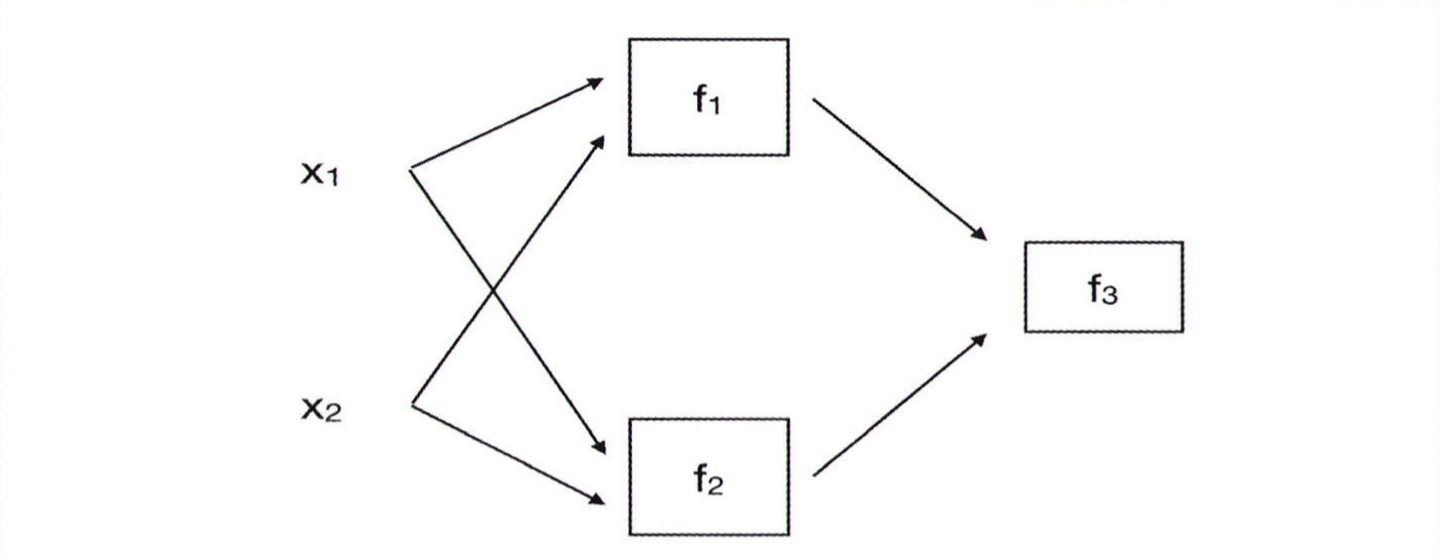

</center>

이 딥러닝 모형의 역전파(backpropagation)를 구하면,
$$
\frac{\partial f_3}{\partial x_1}=\frac{\partial f_1}{\partial x_1}\frac{\partial f_3}{\partial f_1}+
\frac{\partial f_2}{\partial x_1}\frac{\partial f_3}{\partial f_2},\ 
\frac{\partial f_3}{\partial x_2}=\frac{\partial f_1}{\partial x_2}\frac{\partial f_3}{\partial f_1}+
\frac{\partial f_2}{\partial x_2}\frac{\partial f_3}{\partial f_2}
$$
이 된다.

$\phi_x(f,x)$를 예측모형 $f$에 대한 $x$의 SHAP value라고 정의할 때, DeepShap에서는 위의 역전파를 다음과 같이 선형화(linearization)하여 재표현한다.

$$
\frac{\phi_{x_1} (f_3, x_1)}{x_1 - E(x_1)}=\frac{\phi_{x_1}(f_1,x_1)}{x_1-E(x_1)}\frac{\phi_{f_1}(f_3,f_1)}{f_1-E(f_1)}+\frac{\phi_{x_1}(f_2,x_1)}{x_1-E(x_1)}\frac{\phi_{x_1}(f_3,f_1)}{f_2-E(f_2)}
$$

$$
\frac{\phi_{x_2} (f_3, x_2)}{x_2 - E(x_2)}=\frac{\phi_{x_2}(f_1,x_2)}{x_2-E(x_2)}\frac{\phi_{f_1}(f_3,f_1)}{f_1-E(f_1)}+\frac{\phi_{x_2}(f_2,x_2)}{x_2-E(x_2)}\frac{\phi_{x_1}(f_3,f_1)}{f_2-E(f_2)}
$$

이러한 선형화가 성립되기 위해서는 다음과 같은 식, 소위 summation-to-delta 조건을 만족해야 한다.
$$
\sum_{i=1}^{2}\phi_{x_i}f(x_j,x_i)=f_j(x_1,x_2)-f_j(E(x_1),E(x_2)),\ i=1,2
$$
$$
\sum_{i=1}^{2}\phi_{f_i}(f_3,f_i)=f_3(f_1,f_2)-f_3(E(f_1),E(f_2))
$$

$\phi_{x_i}(f_j,x_i)$은 예측모형 $f_j$에 대한 설명변수 $x_1,x_2$의 SHAP value이고 $\phi_{f_i}(f_3,f_i)$는 예측모형 $f_3$에 대한 설명변수 $f_1$과 $f_2$의 SHAP value이기 때문에
$$
\sum_{i=1}^{2}\phi_{x_i}(f_j,x_i)=f_j(x_1,x_2)-E(f_j(x_1,x_2)),\ j=1,2
$$
$$
\sum_{i=1}^{2}\phi_{f_i}(f_3,f_i)=f_3(f_1,f_2)-E(f_3(f_1,f_2))
$$

이다. 그러나 $f_1,f_2$, 그리고 $f_3$가 모두 선형이라고 가정했기 때문에
$$
E(f_j(x_1,x_2)) = f_j(E(x_1),E(x_2)), j=1,2
$$
$$
E(f_3(f_1,f_2)) = f_3(E(f_1),E(f_2))
$$

이 성립되어 Summation-to-delta를 만족한다.

위의 그림에서 딥러닝 모형의 입력층에 입력되는 값으로 입력이 tabular 데이터이면 1D 텐서인 설명변수이고, text 데이터이면 2D 텐서 데이터로 말뭉치를 나타내는 index이고, image 데이터이면 3D 텐서 데이터로 픽셀이 된다.

다음은 Deep SHAP을 구현하기 위해 0-9 숫자 이미지로 구성된 MNIST 데이터에 CNN 모형을 적합한 것을 보여주고 있다.

In [5]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

In [7]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

print('x_train shape:',x_train.shape)

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

x_train shape: (60000, 28, 28, 1)


In [10]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64,3,strides=2,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy'])

model.fit(x_train,y_train,batch_size = 128,epochs=20,validation_data=(x_test,y_test),verbose=0)
score = model.evaluate(x_test,y_test,verbose=0)

print('Test loss:',score[0])
print('Test accuracy:',score[1])

Test loss: 0.026828616857528687
Test accuracy: 0.9921000003814697


다음은 SHAP value를 계산할 x_test[1:5]에 대한 딥러닝 모형의 예측 결과가 [2,1,0,4] label임을 보여주고 있고, SHAP value를 구하기 위한 표본을 임의로 뽑아 1000개 뽑아 이를 `DeepExplainer`에 적용한다. x_test[1:5]에 대한 SHAP value는 (10,4,28,28,1) 5D 텐서로 출력된다. 10은 label의 수(0~9), 4는 표본 수, (28,28,1)은 각 픽셀별 SHAP value를 의미한다. 입력 텐서가 (4,28,28,1)인 4D 텐서이므로 SHAP value 10개 label 각각에 대해 입력 텐서만큼 출력하기 때문이다.

In [13]:
import shap
import numpy as np

result=np.argmax(model.predict(x_test[1:5]),axis=-1)
print(result)

background = x_train[np.random.choice(x_train.shape[0],1000,replace=False)]
e = shap.DeepExplainer(model,background)
shap_values = e.shap_values(x_test[1:5])
print(np.array(shap_values).shape)

1/1 [==============================] - 0s 38ms/step
[2 1 0 4]


Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


(10, 4, 28, 28, 1)


앞에서 구한 x_test[1:5]에 대한 SHAP value를 다음과 같이 image_plot을  통해 그림으로 구현한다. 아래 출력에서 맨 왼쪽 이미지는 입력 이미지이며 각 입력 이미지별로 출력은 10개 label에 속할 확률이므로 두 번째 열부터 차례대로 0부터 9까지의 SHAP value를 그림으로 표현한다.

입력 이미지를 모두 정확하게 예측하였기 때문에 2는 네 번째 column, 1은 세 번째 column, 0은 두 번째 column, 4는 6번째 column 이미지가 빨간색으로 표현된 것을 볼 수 있다. 빨간색일수록 SHAP value가 큰 값이고 파란색에 가까울수록 작은 값을 가진다. 0은 이미지 테두리와 내부가 빨간 색으로 나타난 것으로 보아 0 이미지가 원형이고 내부가 비어있는 것이 중요한 역할을 하는 것으로 보인다. 4는 4 이미지의 위쪽 부분이 연결되냐 아니냐에 따라 4 또는 9로 분류하는 것으로 판단된다.

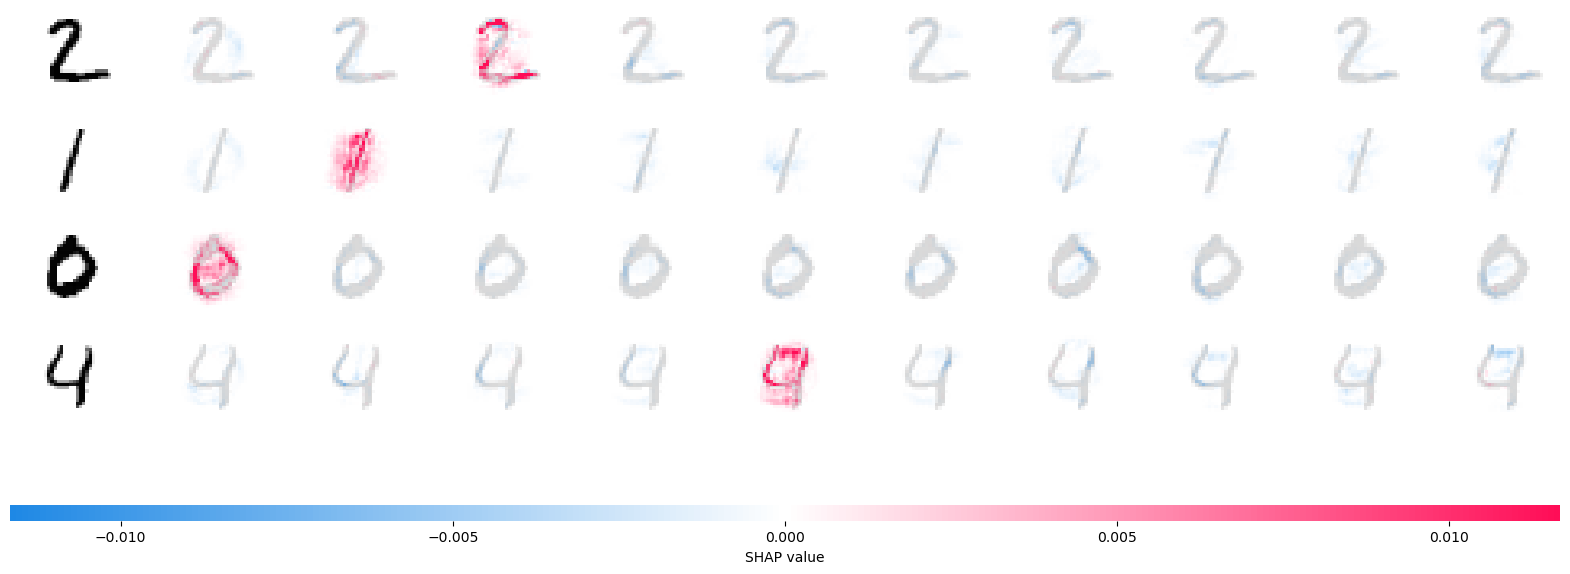

In [14]:
shap.image_plot(shap_values,-x_test[1:5])

---

## SHAP Interaction values

변수들의 교호작용에 대해서도 SHAP value를 계산할 수 있으며, 이를 interaction SHAP value라고 한다. 다만, interaction SHAP value는 현재까지는 오직 `shap.Tree.Explainer`에서만 구할 수 있다.

Interaction SHAP value들의 관계와 의미를 살펴보기 위해 다음과 같이 boston house 데이터를 호출하고 XGBoost 모델로 학습시킨다.  
- rm : 집에 있는 방의 개수  
- age : 소유주의 연령, 중위수 이상이면 1, 그렇지 않으면 0으로 범주화  
- crim : 지역범죄율  
- nox : 질소산화물 농도  


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBRegressor

In [57]:
df=pd.read_csv('C:/Users/user/XAI/data/Boston.csv',index_col=False)

X=df[['RM','AGE','CRIM','NOX']]
y=df['PRICE']

X['AGE']=np.where(X['AGE']>77.5,1,0)
X100=X.iloc[100:200]


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [58]:
model = XGBRegressor(n_estimator =500,max_depth=3)
model.fit(X,y)

y_pred = model.predict(X)
np.corrcoef(y,y_pred)

array([[1.        , 0.98709811],
       [0.98709811, 1.        ]])

`TreeExplainer`를 이용하여 100개의 자료를 이용하여 XGBoost 모형의 SHAP value와 interaction SHAP value를 구한다.

In [59]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X100)

interaction_values = explainer.shap_interaction_values(X100)

다음 코드의 결과로 $E(f(x))$의 추정치가 22.53이고 첫 번째 표본의 SHAP value $\phi_1$~$\phi_4$를 보여준다.

In [60]:
#Getting shape of interaction values
expected = explainer.expected_value
print(expected)
print(shap_values[0])
print(np.shape(interaction_values))
print(shap_values[0,0]-sum(interaction_values[0,0:1]))

#SHAP interaction values for first data
pd.DataFrame(interaction_values[0],index=X.columns,columns=X.columns)

22.533827
[ 2.9392457  -0.6986173   1.5757854  -0.01473827]
(100, 4, 4)
[0.2941835 2.7682626 2.796486  2.9588053]


,RM,AGE,CRIM,NOX
RM,2.645062,0.170983,0.142760,-0.019560
AGE,0.170983,-1.043341,0.239739,-0.065998
CRIM,0.142761,0.239739,0.864739,0.328547
NOX,-0.019560,-0.065998,0.328547,-0.257728


다음에 의해 첫 번째 표본의 interaction SHAP value들을 모두 합한 후, $E(f(x))$의 추정치를 합해 주면 예측된 주택 가격과 일치하는 것을 알 수 있다.

In [61]:
y_pred = model.predict(X100)

#Sum of interaction values for first data
sum_shap = np.sum(interaction_values[0])

#values below should be the same
print('Model prediction: {}'.format(y_pred[0]))
print('Mean prediction + interaction values: {}'.format(expected+sum_shap))

Model prediction: 26.33548355102539
Mean prediction + interaction values: 26.33550262451172


다음은 하나의 특정 표본이 아니라 100개의 표본 전체에 대해 평균적 교호작용 효과와 주 효과를 측정하는 코드이다. 표본별 interaction SHAP value들의 부호에 의한 상쇄효과를 방지하기 위해 절댓값의 평균을 구해 heatmap으로 구현한다.

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'RM'),
  Text(0, 1.5, 'AGE'),
  Text(0, 2.5, 'CRIM'),
  Text(0, 3.5, 'NOX')])

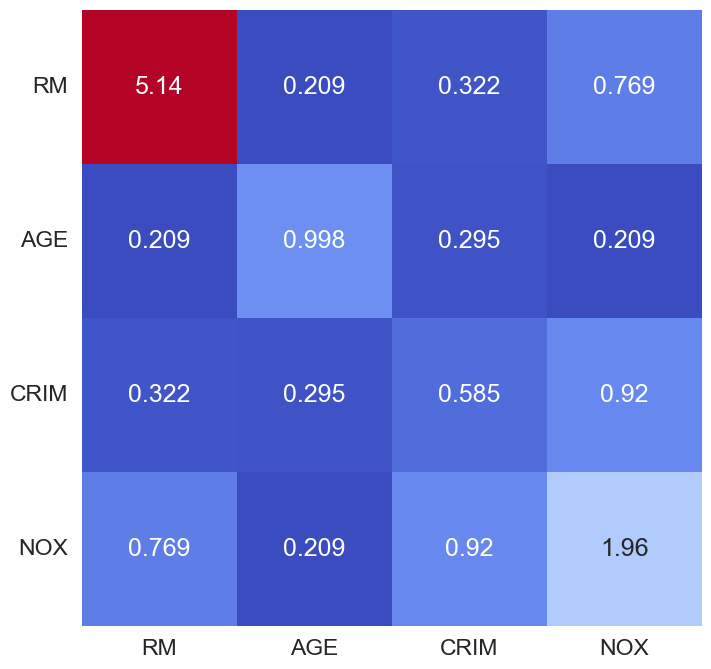

In [62]:
#절댓값의 평균
mean_shap = np.abs(interaction_values).mean(0)
df = pd.DataFrame(mean_shap,index=X.columns,columns=X.columns)

df.where(df.values ==np.diagonal(df),df.values*2,inplace=True)

plt.figure(figsize=(8,8),facecolor='w',edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(df,cmap='coolwarm',annot=True,fmt='.3g',cbar=False)
plt.yticks(rotation=0)

해당 heatmap을 살펴보면 주 효과는 대각행렬의 값의 크기에 따라 RM,NOX,AGE,CRIM 순으로 예측값에 기여하고 있고 RM은 NOX와 교호작용이 가장 크고, AGE는 CRIM과, NOX는 CRIM과 교호작용이 가장 크게 나타났다.

다음 그림은 `summary_plot`으로 교호작용 SHAP value를 보여준다.

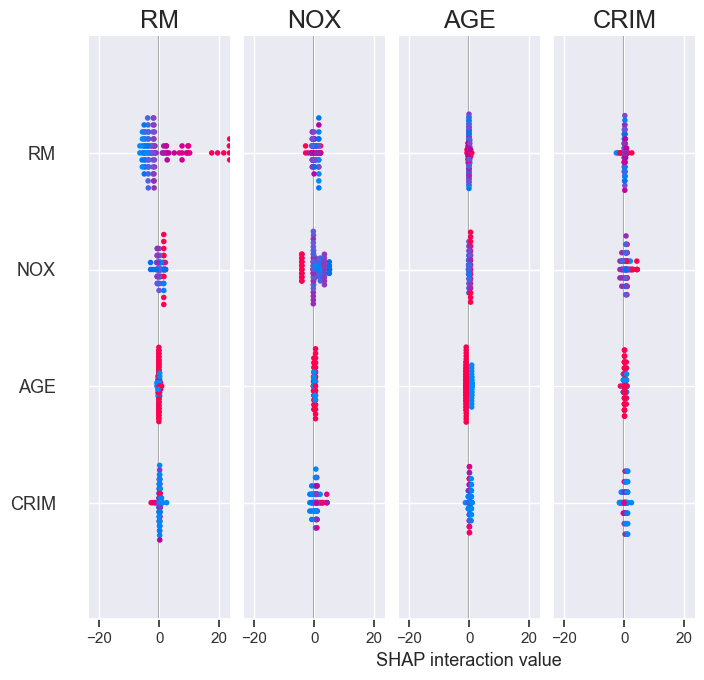

In [63]:
shap.summary_plot(interaction_values,X100)

첫 번째 plot(RM)을 살펴보면, x 축의 shap value가 증가하면서 파란색에서 빨간색으로 변하기 때문에 RM의 주 효과는 예측치에 대해 양의 기여도를 가지고 있지만, NOX와 AGE는 빨간색에서 파란색으로 변하므로 예측치에 대해 음의 기여도를 가지고 있다는 것을 알 수 있다.

교호작용효과를 더 자세히 진단하기 위해 NOX와 CRIM의 interaction SHAP value들의 `dependent_plot`을 통해 아래와 같이 볼 수 있다.

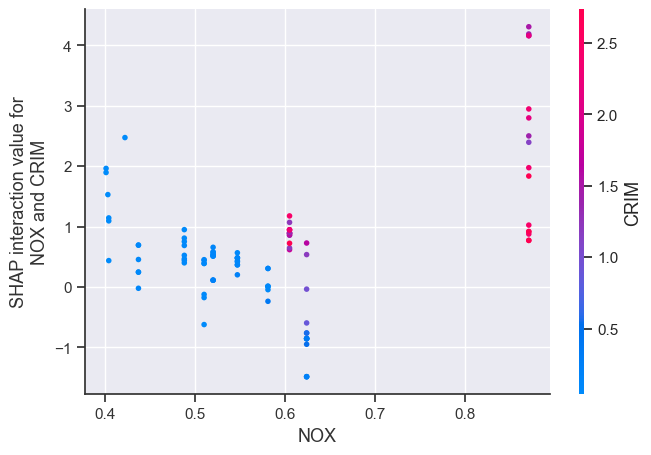

In [66]:
shap.dependence_plot(('NOX','CRIM'),interaction_values,X100,display_features=X)

범죄율이 낮으면 (plot에서 파란 색) 질소산화물농도가 증가하면서 SHAP value가 감소(예측치에 대한 기여도가 감소)하지만, 범죄율이 높으면(plot에서 빨간색) SHAP value가 증가한 것을 볼 수 있다.

다음은 RM과 AGE의 교호작용효과를 살펴본다.

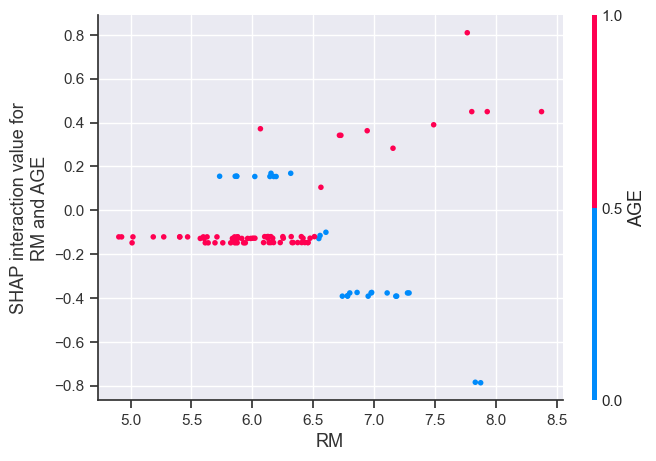

In [65]:
shap.dependence_plot(('RM','AGE'),interaction_values,X100,display_features=X)

나이가 중위수보다 높으면(빨간색) RM이 증가하면 경향을 보이면서 SHAP value도 증가하지만, 나이가 중위수 미만이면(파란색) RM이 감소하면서 동시에 SHAP value도 낮아진다.